**ASSIGNMENT:**

**SUBIMITTED BY**
* **KORTHIWADA SHASHANK**
* **Email:** kshashank2301@gmail.com


**PROBLEM DEFINITION**

Time Series forecasting techniques are very important for a data scientist to master as time series data occur in every domain from medical, stock market, climate change prediction, and so on. In that note, here we have presented in front of you an opportunity to master time series forecasting techniques and along with that stand an opportunity to get an internship with TerraBlue XT.

* Download the data required the assignment from: https://www.kaggle.com/c/predice-el-futuro/data

* Data consist of two files:
    * train_csv.csv: The training dataset consists of 80 observation with observation id, timestamp and feature value.
    * test_csv.csv:The next 40 observation along with observation id and timestamp are present here. You'll have to predict the value of feature at these timestamps, along with the RMSE score.

**Value to predict** : The value of feature attribute has to be predicted.

Date & time of submission:

12th June, 2020 by 6 PM

Mode of submission:

Google collab or Python notebook. 

Email to send your assignments:

interns@teblux.comm


**METHODOLOGY**

* Given time-series data is first read into a pandas dataframe.
* Various characteristics of the data are understood using various plots so as to apply time-series analysis methods if necessary and procced futher to forecasting.
* Two models are tried, namely, **ARIMA** and **SMARIMAX** to get the predictions for the timestamps present in the test_csv and their RMSE are also reported.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
train_data=pd.read_csv("C:/Users/shashank/Data/train_csv.csv",parse_dates=['time'],infer_datetime_format=True,
                       index_col='time').drop('id',axis=1)
train_data.index = pd.DatetimeIndex(train_data.index.values,
                               freq=train_data.index.inferred_freq)

display(train_data.head())
test_data=pd.read_csv("C:/Users/shashank/Data/test_csv.csv",parse_dates=['time'],index_col='time').drop('id',axis=1)
display(test_data.head())

,feature
2019-03-19 00:00:00,237.97
2019-03-19 00:00:10,57.93
2019-03-19 00:00:20,90.53
2019-03-19 00:00:30,260.75
2019-03-19 00:00:40,49.70


""
time
2019-03-19 00:13:20
2019-03-19 00:13:30
2019-03-19 00:13:40
2019-03-19 00:13:50
2019-03-19 00:14:00


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 80 entries, 2019-03-19 00:00:00 to 2019-03-19 00:13:10
Freq: 10S
Data columns (total 1 columns):
feature    80 non-null float64
dtypes: float64(1)
memory usage: 1.2 KB


In [4]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 40 entries, 2019-03-19 00:13:20 to 2019-03-19 00:19:50
Empty DataFrame

In [5]:
train_data.describe()

,feature
count,80.000000
mean,147.496375
std,96.846260
min,21.360000
25%,66.730000
50%,125.240000
75%,199.820000
max,469.720000


In [6]:
train_data.tail(10)

,feature
2019-03-19 00:11:40,156.46
2019-03-19 00:11:50,111.91
2019-03-19 00:12:00,153.83
2019-03-19 00:12:10,83.51
2019-03-19 00:12:20,401.43
2019-03-19 00:12:30,469.72
2019-03-19 00:12:40,406.79
2019-03-19 00:12:50,128.91
2019-03-19 00:13:00,85.28
2019-03-19 00:13:10,121.12


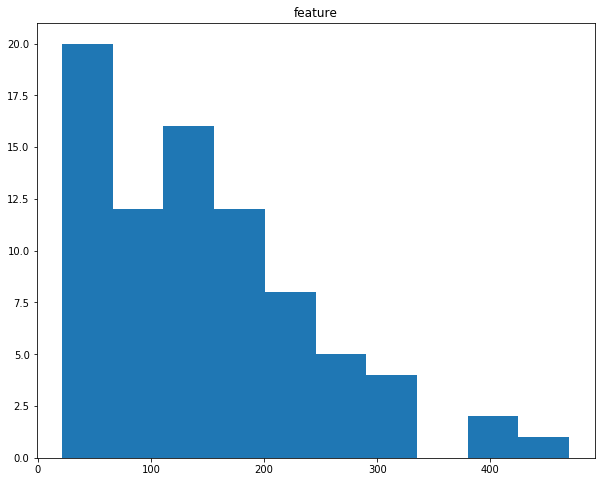

In [7]:
train_data.hist(bins=10,figsize=(10,8),grid=False);

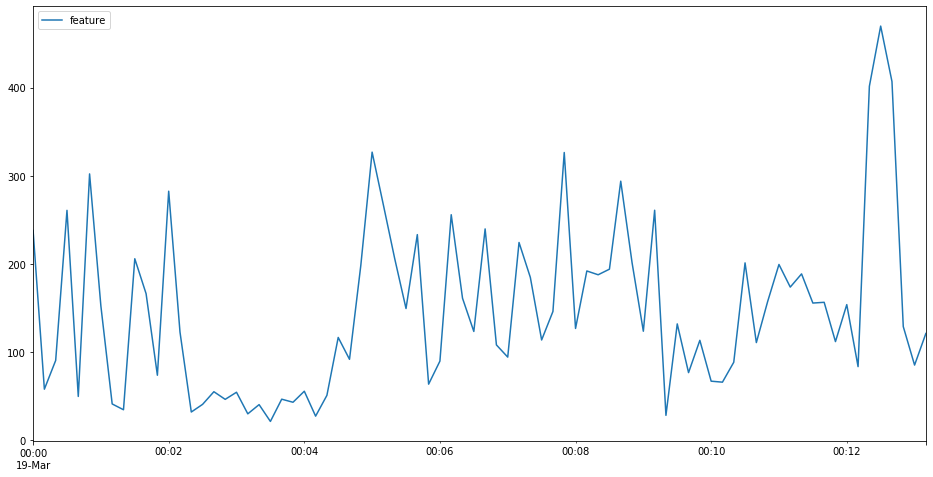

In [8]:
train_data.plot(figsize=(16,8));

In [9]:
train_data.feature

2019-03-19 00:00:00    237.97
2019-03-19 00:00:10     57.93
2019-03-19 00:00:20     90.53
2019-03-19 00:00:30    260.75
2019-03-19 00:00:40     49.70
                        ...  
2019-03-19 00:12:30    469.72
2019-03-19 00:12:40    406.79
2019-03-19 00:12:50    128.91
2019-03-19 00:13:00     85.28
2019-03-19 00:13:10    121.12
Freq: 10S, Name: feature, Length: 80, dtype: float64

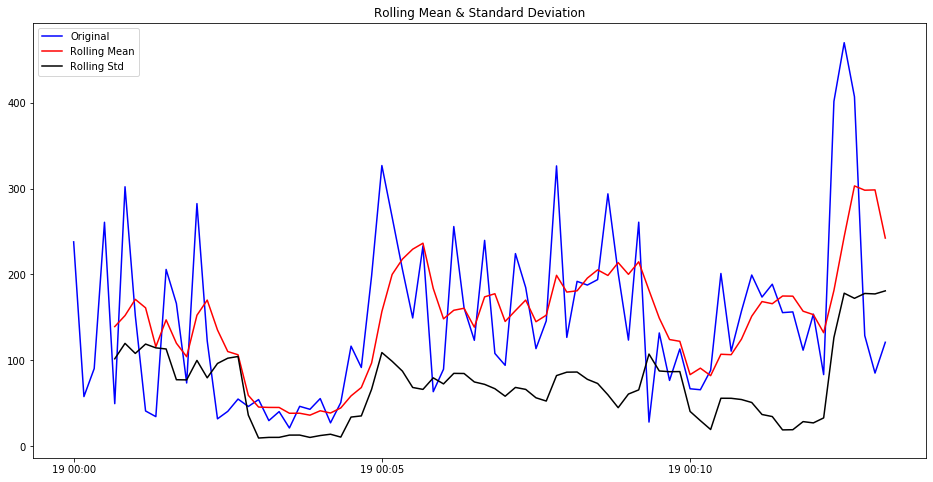

In [10]:
rolmean = train_data.feature.rolling(5).mean()
rolstd = train_data.feature.rolling(5).std()

#Plot rolling statistics:
fig,ax= plt.subplots(figsize=(16,8))
ax.plot(train_data.feature, color='blue',label='Original')
ax.plot(rolmean, color='red', label='Rolling Mean')
ax.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()



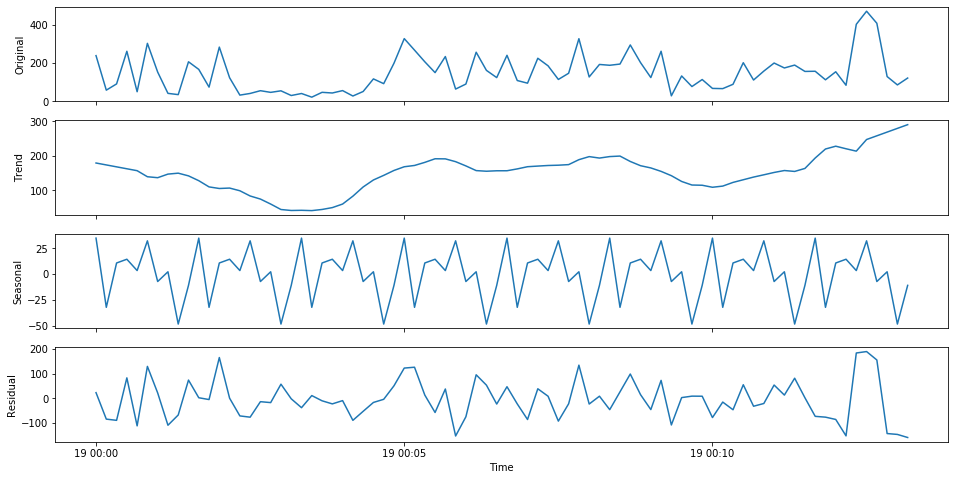

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
#additive decomposition
decomposition = seasonal_decompose(train_data.feature,model='additive',period=10,extrapolate_trend='freq')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


fig,ax=plt.subplots(4,1,sharex=True,figsize=(16,8))
ax[0].plot(train_data.feature )
ax[0].set(ylabel='Original')
ax[1].plot(trend)
ax[1].set(ylabel='Trend')
ax[2].plot(seasonal)
ax[2].set(ylabel='Seasonal')
ax[3].plot(residual)
ax[3].set(ylabel='Residual')
plt.xlabel('Time')
plt.show()

In [12]:
# from statsmodels.tsa.seasonal import seasonal_decompose
#multiplicative decomposition
# decomposition_m = seasonal_decompose(train_data.feature,model='multiplicative',period=10,extrapolate_trend='freq')
# trend = decomposition_m.trend
# seasonal = decomposition_m.seasonal
# residual = decomposition_m.resid


# fig,ax=plt.subplots(4,1,sharex=True,figsize=(16,8))
# ax[0].plot(train_data.feature )
# ax[0].set(ylabel='Original')
# ax[1].plot(trend)
# ax[1].set(ylabel='Trend')
# ax[2].plot(seasonal)
# ax[2].set(ylabel='Seasonal')
# ax[3].plot(residual)
# ax[3].set(ylabel='Residual')
# plt.xlabel('Time')
# plt.show()

**Checking the stationarity of the time series, in order to determine the number of differencing required to make the series stationary and thus use it in the ARIMA model**

In [13]:
from statsmodels.tsa.stattools import adfuller, kpss

# ADF Test
result = adfuller(train_data.feature, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print(f'num lags: {result[2]}')
for key, value in result[4].items():
    print(f'Critial Value ({key}) :  {value}')

# KPSS Test
# result = kpss(train_data.feature, regression='c')
# print('\nKPSS Statistic: %f' % result[0])
# print(f'num lags: {result[2]}')
# print('p-value: %f' % result[1])
# for key, value in result[3].items():
#     print(f'Critial Values ({key}) :{value}')

ADF Statistic: -5.945866499650217
p-value: 2.205049473411678e-07
num lags: 0
Critial Value (1%) :  -3.5159766913976376
Critial Value (5%) :  -2.898885703483903
Critial Value (10%) :  -2.5866935058484217


**ADF Test**
* The p-value is obtained is less than significance level of 0.05 and the ADF statistic is also less than any of the critical values.
* So, we reject the null hypothesis and infer that the time series is  stationary.



**Estimating parameters for ARIMA and SARIMA model**
* The probable value for the parameter for number of differences (d) can be taken as 0 as series is stationary. 
* Ploting Autocorelation and Partial Autocorelation charts to get possible values of q and p respectively for an ARIMA model


In [14]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

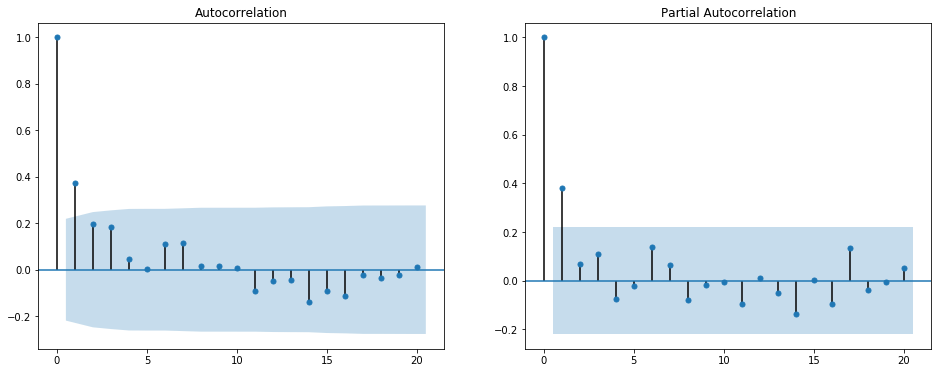

In [15]:
fig,ax = plt.subplots(1,2,figsize=(16,6))
plot_acf(train_data.feature,ax=ax[0])
plot_pacf(train_data.feature,ax=ax[1])
plt.show()

From **Partial Autocorelation plot** for level three the corelation is within the limits and same with **Autocorelation plot**
* probable value for p=3
* probable value for q=3


**Note:** We might change these values based on the performance of the model

In [16]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

## ARIMA MODEL

* From the above analysis we got p=3,d=0,q=3. So we will try **p=3 (+1,-1)** **q=3 (+1,-1)** and keep the one with best results

In [17]:
#model fitting 
model = ARIMA(train_data.feature, order=(2,0,3))  
AR_model = model.fit(disp=-1)  
AR_model.summary()

D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                feature   No. Observations:                   80
Model:                     ARMA(2, 3)   Log Likelihood                -472.778
Method:                       css-mle   S.D. of innovations             87.634
Date:                Tue, 16 Jun 2020   AIC                            959.556
Time:                        15:14:30   BIC                            976.230
Sample:                    03-19-2019   HQIC                           966.241
                         - 03-19-2019                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           147.7872     14.196     10.410      0.000     119.963     175.612
ar.L1.feature     0.9156      0.092      9.942      0.000       0.735       1.096
ar.L2.feature    -0.9190      0.081    -11.392      0.000      -1.077      -0.761
ma.L1.feature    -0.5767      0.129     -4.471      0.000      -0.830      -0.324
ma.L2.feature     0.7183      0.076      9.504      0.000       0.570       0.866
ma.L3.feature     0.3157      0.113      2.788      0.005       0.094       0.538
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.4981           -0.9165j            1.0431           -0.1708
AR.2            0.4981           +0.9165j            1.0431            0.1708
MA.1            0.4462           -0.8949j            1.0000           -0.1764
MA.2            0.4462           +0.8949j            1.0000            0.1764
MA.3           -3.1679           -0.0000j            3.1679           -0.5000
-----------------------------------------------------------------------------
"""

In [18]:
#Training predictions
train_preds = AR_model.predict(train_data.index[0],train_data.index[79])
print(train_preds.head())

2019-03-19 00:00:00    147.787180
2019-03-19 00:00:10    179.299665
2019-03-19 00:00:20    110.290506
2019-03-19 00:00:30    131.040528
2019-03-19 00:00:40    183.696666
Freq: 10S, dtype: float64


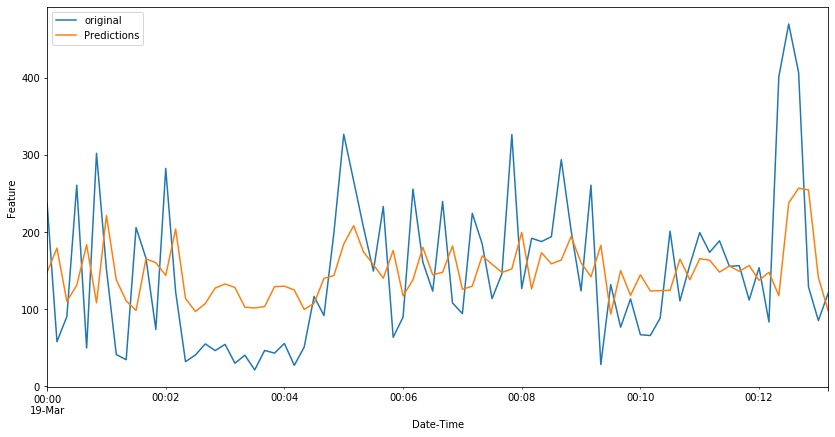

In [19]:
train_data.plot(figsize=(14, 7))
train_preds.plot(figsize=(14, 7))
plt.xlabel('Date-Time')
plt.ylabel('Feature')
plt.legend(['original','Predictions'])
plt.show()

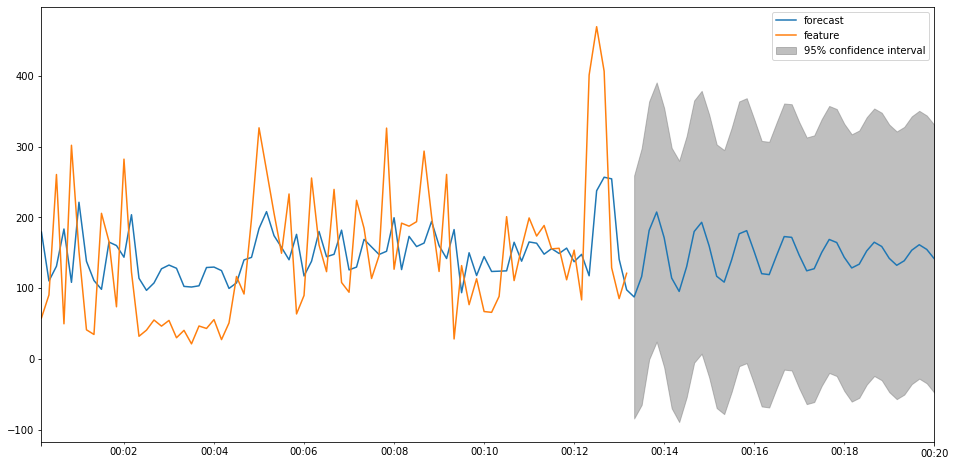

In [20]:
#predictions
fig,ax = plt.subplots(figsize=(16,8))
AR_model.plot_predict(1,120,ax=ax)
plt.show()

In [21]:
#Test predictions
test_preds = AR_model.predict(test_data.index[0],test_data.index[39])

In [22]:
#Evaluation on training data

mse = mean_squared_error(y_true=train_data.feature,
                   y_pred=train_preds)
mae = mean_absolute_error(y_true=train_data.feature,
                   y_pred=train_preds)
rmse = mse**0.5

eval_arima = pd.DataFrame({'ARIMA':[mse,mae,rmse]},index=['MSE','MAE','RMSE'])
eval_arima

,ARIMA
MSE,7959.598968
MAE,71.657877
RMSE,89.216585


**Note:** We might get lower RMSE with a different set of (p,d,q) and fit the training data well but that does not capture the seasonality of the series and would give a linear predictions on futute timeseries. Hence, above parameters seems appropriate for forecasting.

## SARIMAX MODEL

In [23]:
#Creating a Grid to search for best parameters for SARIMAX model
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 10) for x in list(itertools.product(p, d, q))]

In [24]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = SARIMAX(train_data.feature,order=param,seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
            results = mod.fit()

            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 10) - AIC:1042.4035372531396
ARIMA(0, 0, 0)x(0, 0, 1, 10) - AIC:893.0054425902014
ARIMA(0, 0, 0)x(0, 1, 0, 10) - AIC:867.1764553672831
ARIMA(0, 0, 0)x(0, 1, 1, 10) - AIC:727.5594004413975
ARIMA(0, 0, 0)x(1, 0, 0, 10) - AIC:875.7259541497218
ARIMA(0, 0, 0)x(1, 0, 1, 10) - AIC:855.4390745840641
ARIMA(0, 0, 0)x(1, 1, 0, 10) - AIC:741.7474034292349
ARIMA(0, 0, 0)x(1, 1, 1, 10) - AIC:729.523314932011
ARIMA(0, 0, 1)x(0, 0, 0, 10) - AIC:988.1740013827846
ARIMA(0, 0, 1)x(0, 0, 1, 10) - AIC:846.3444469148501
ARIMA(0, 0, 1)x(0, 1, 0, 10) - AIC:845.9459337910353
ARIMA(0, 0, 1)x(0, 1, 1, 10) - AIC:707.7166502734658
ARIMA(0, 0, 1)x(1, 0, 0, 10) - AIC:860.0425763833941
ARIMA(0, 0, 1)x(1, 0, 1, 10) - AIC:836.8847416363039
ARIMA(0, 0, 1)x(1, 1, 0, 10) - AIC:734.122014698786
ARIMA(0, 0, 1)x(1, 1, 1, 10) - AIC:709.2981197974151
ARIMA(0, 1, 0)x(0, 0, 0, 10) - AIC:951.5451699616596
ARIMA(0, 1, 0)x(0, 0, 1, 10) - AIC:821.7649833599886
ARIMA(0, 1, 0)x(0, 1, 0, 10) - AIC:862.87725579

In [25]:
mod = SARIMAX(train_data.feature,
                                order=(1,0,1),
                                seasonal_order=(0,1,1 ,10),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
S_model = mod.fit()
S_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                            feature   No. Observations:                   80
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 10)   Log Likelihood                -349.778
Date:                            Tue, 16 Jun 2020   AIC                            707.556
Time:                                    15:15:05   BIC                            715.798
Sample:                                03-19-2019   HQIC                           710.766
                                     - 03-19-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5078      0.255      1.989      0.047       0.007       1.008
ma.L1         -0.0868      0.300     -0.289      0.772      -0.675       0.501
ma.S.L10      -0.6883      0.218     -3.163      0.002      -1.115      -0.262
sigma2      9707.3988   1572.098      6.175      0.000    6626.144    1.28e+04
===================================================================================
Ljung-Box (Q):                       31.57   Jarque-Bera (JB):                 3.42
Prob(Q):                              0.83   Prob(JB):                         0.18
Heteroskedasticity (H):               1.36   Skew:                             0.58
Prob(H) (two-sided):                  0.51   Kurtosis:                         3.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

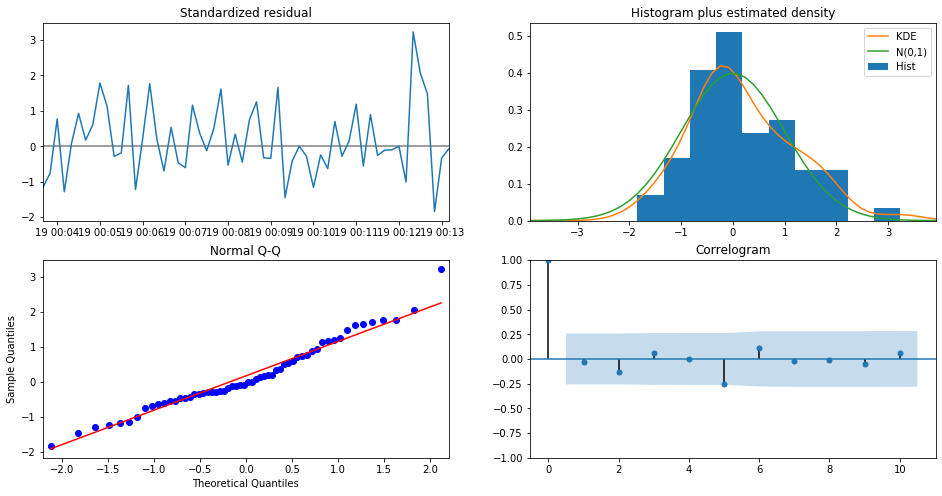

In [26]:
S_model.plot_diagnostics(figsize=(16, 8))
plt.show()

In [27]:
#Training predictions
train_preds = S_model.predict(train_data.index[0],train_data.index[79])
print(train_preds.head())

2019-03-19 00:00:00     0.000000
2019-03-19 00:00:10    60.421955
2019-03-19 00:00:20    30.010207
2019-03-19 00:00:30    31.632040
2019-03-19 00:00:40    78.133903
Freq: 10S, dtype: float64


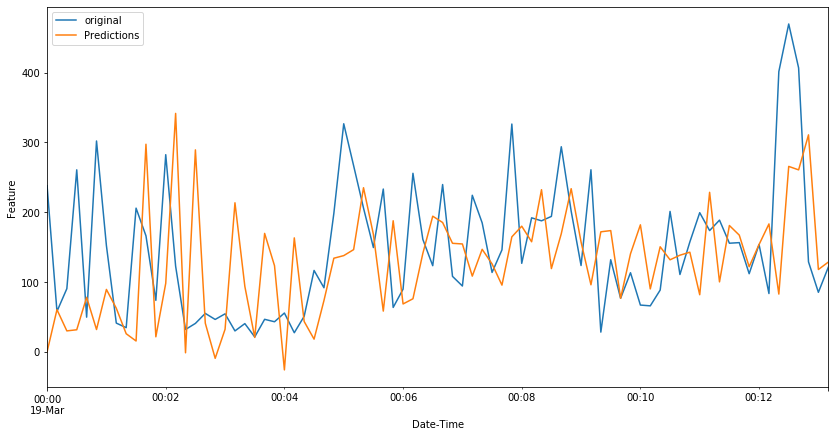

In [28]:
train_data.plot(figsize=(14, 7))
train_preds.plot(figsize=(14, 7))
plt.xlabel('Date-Time')
plt.ylabel('Feature')
plt.legend(['original','Predictions'])
plt.show()

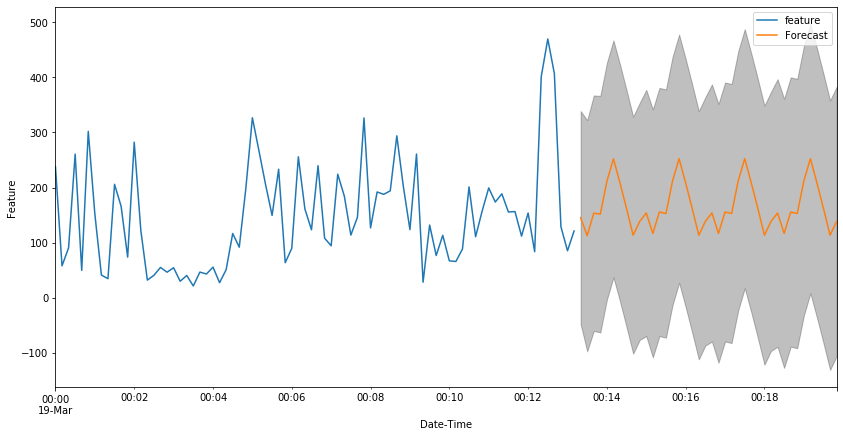

In [29]:
pred_uc = S_model.get_forecast(steps=40)
pred_ci = pred_uc.conf_int()
ax = train_data.plot(figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date-Time')
ax.set_ylabel('Feature')
plt.legend()
plt.show()

In [30]:
#Test predictions
test_preds = S_model.predict(test_data.index[0],test_data.index[39])

In [31]:
#Evaluation on training data

mse = mean_squared_error(y_true=train_data.feature,
                   y_pred=train_preds)
mae = mean_absolute_error(y_true=train_data.feature,
                   y_pred=train_preds)
rmse = mse**0.5

eval_sarimax = pd.DataFrame({'SARIMAX':[mse,mae,rmse]},index=['MSE','MAE','RMSE'])
eval_sarimax

,SARIMAX
MSE,12731.620503
MAE,84.906599
RMSE,112.834483


In [32]:
#comparing two models
print('Comparision Between ARIMA and SARIMAX models')
eval_arima.merge(eval_sarimax,left_index=True, right_index=True)

Comparision Between ARIMA and SARIMAX model


,ARIMA,SARIMAX
MSE,7959.598968,12731.620503
MAE,71.657877,84.906599
RMSE,89.216585,112.834483
